### Exemplo questão (1) - Trabalho 1 
#### pacotes necessários:

In [22]:
pip install astropy

In [23]:
pip install specutils

In [43]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u 
import astropy.wcs as fitswcs 
from specutils import Spectrum
from scipy.optimize import curve_fit

#### Nessa questão, vamos utilizar a equação de Planck em termos da radiância espectral:
### $\displaystyle B(\lambda, T)=\frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda k_BT}-1}$
####
#### Para extrair os dados do arquivo:

In [45]:
data = fits.open("sun_reference_stis_002.fits")[1].data  

# obtêm os dados de comprimentos de onda e converte para metros.
wavelength = data['WAVELENGTH'] * 1e-10
# obtêm os dados de radiância e normaliza.
radiance = data['FLUX'] / np.max(data['FLUX'])   

#### Para cada plot, substitua o nome do arquivo em fits.open("...")[1].data  
####
#### Agora defina as constantes $h, c$ e $k_B$ e a função $B(\lambda, T)$ fornecida acima.
#### Como normalizamos os dados de radiância, temos que normalizar também a equação de Planck.

In [1]:
# def spectral_radiance( , ):
#     B = ... 
#     return B / np.max(B)

####
#### Agora encontramos qual temperatura que melhor ajusta os dados:

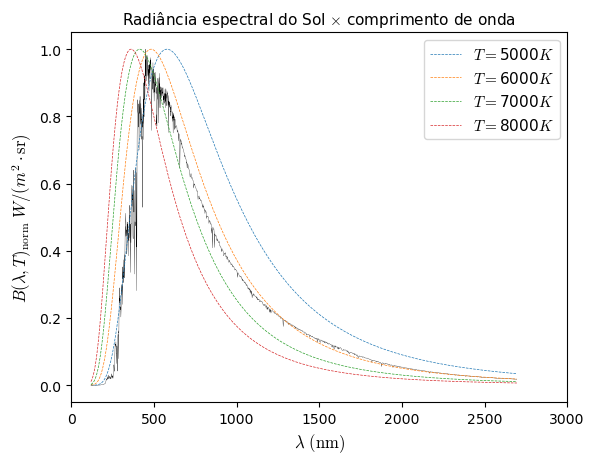

In [47]:
plt.figure()
plt.plot(wavelength*1e9, radiance, '-', lw=0.2, color='black')

for temperature in [5000, 6000, 7000, 8000]:
    plt.plot(wavelength*1e9, spectral_radiance(wavelength, temperature), '--', 
             lw = 0.5, label=r'$T = $' + str(temperature) + r'$K$')

plt.rcParams['mathtext.fontset'] = 'cm'
plt.title('Radiância espectral do Sol ' + r'$\times$' + ' comprimento de onda', fontsize=11)
plt.xlabel(r'$\lambda\ (\text{nm})$', fontsize=12)
plt.ylabel(r'$B(\lambda, T)_{\text{norm}}\ W/(m^2\cdot \text{sr})$', fontsize=12)
plt.legend(fontsize=11)
plt.xlim(0, 3000)
plt.show()

#### 
#### Também podemos utilizar uma função do scipy para ajustar os dados:

In [29]:
chute_inicial = 3000 
popt, pcov = curve_fit(spectral_radiance, wavelength, radiance, chute_inicial)
T_fit = popt[0]
T_fit

5567.114500045244

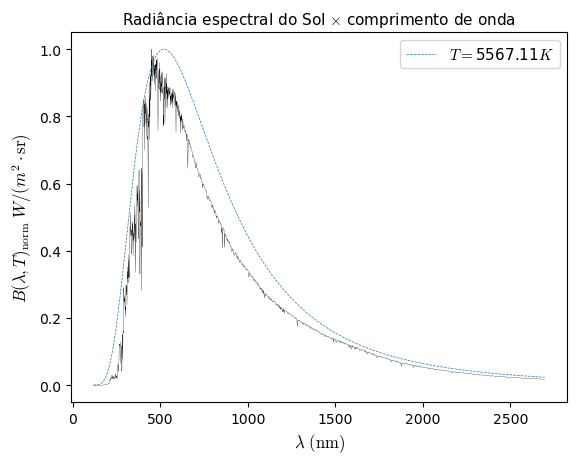

In [42]:
plt.figure()
plt.plot(wavelength*1e9, radiance, '-', lw=0.2, color='black')
plt.plot(wavelength*1e9, spectral_radiance(wavelength, T_fit), '--', lw = 0.5, 
         label=r'$T = $' + str(round(T_fit, 2)) + r'$K$')
plt.title('Radiância espectral do Sol ' + r'$\times$' + ' comprimento de onda', fontsize=11)
plt.xlabel(r'$\lambda\ (\text{nm})$', fontsize=12)
plt.ylabel(r'$B(\lambda, T)_{\text{norm}}\ W/(m^2\cdot \text{sr})$', fontsize=12)
plt.legend(fontsize=11)
plt.show()

#### Temperatura da superfície do Sol: 
### $\ T \approx 5772 K$
#### Temperatura estimada pela equação de Planck: 
### $\ T \approx 5567 K$